In [1]:
import numpy as np
import pandas as pd
import itertools
import statsmodels.api as sm
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from matplotlib import pyplot as plt
from pandas.plotting import autocorrelation_plot
from matplotlib.pyplot import figure
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
warnings.filterwarnings('ignore')


In [2]:
Dataset= pd.read_csv('Dataset.csv')
Dataset.dtypes

Sr                   int64
Date                object
Room Amount        float64
Dine In Amount       int64
Takeaway Amount      int64
Bar Amount           int64
dtype: object

In [3]:
Dataset['Date'] = pd.to_datetime(Dataset.Date, format="%d-%m-%Y")
Dataset.head()


Sr       Date  Room Amount  Dine In Amount  Takeaway Amount  Bar Amount
0   1 2013-09-01          0.0           53722                0        7760
1   2 2013-09-02          0.0           39137                0       25239
2   3 2013-09-03          0.0             597                0        4127
3   4 2013-09-04          0.0               0                0        2273
4   5 2013-09-05          0.0            4999                0       12505

In [4]:
Dataset.dtypes


Sr                          int64
Date               datetime64[ns]
Room Amount               float64
Dine In Amount              int64
Takeaway Amount             int64
Bar Amount                  int64
dtype: object

In [5]:
Bar_adt = Dataset['Bar Amount']
adfuller(Bar_adt)


(-2.824188219057194,
 0.05490085623240296,
 28,
 2973,
 {'1%': -3.432551464895929,
  '5%': -2.8625126635320393,
  '10%': -2.567287774919901},
 61332.795406456666)

In [6]:
Data_Dine =Dataset[['Date','Dine In Amount']]
Data_Dine=Data_Dine.set_index('Date')
Data_Dine.head()


Dine In Amount
Date                      
2013-09-01           53722
2013-09-02           39137
2013-09-03             597
2013-09-04               0
2013-09-05            4999

In [7]:
Data_Dine= Data_Dine.asfreq('D')

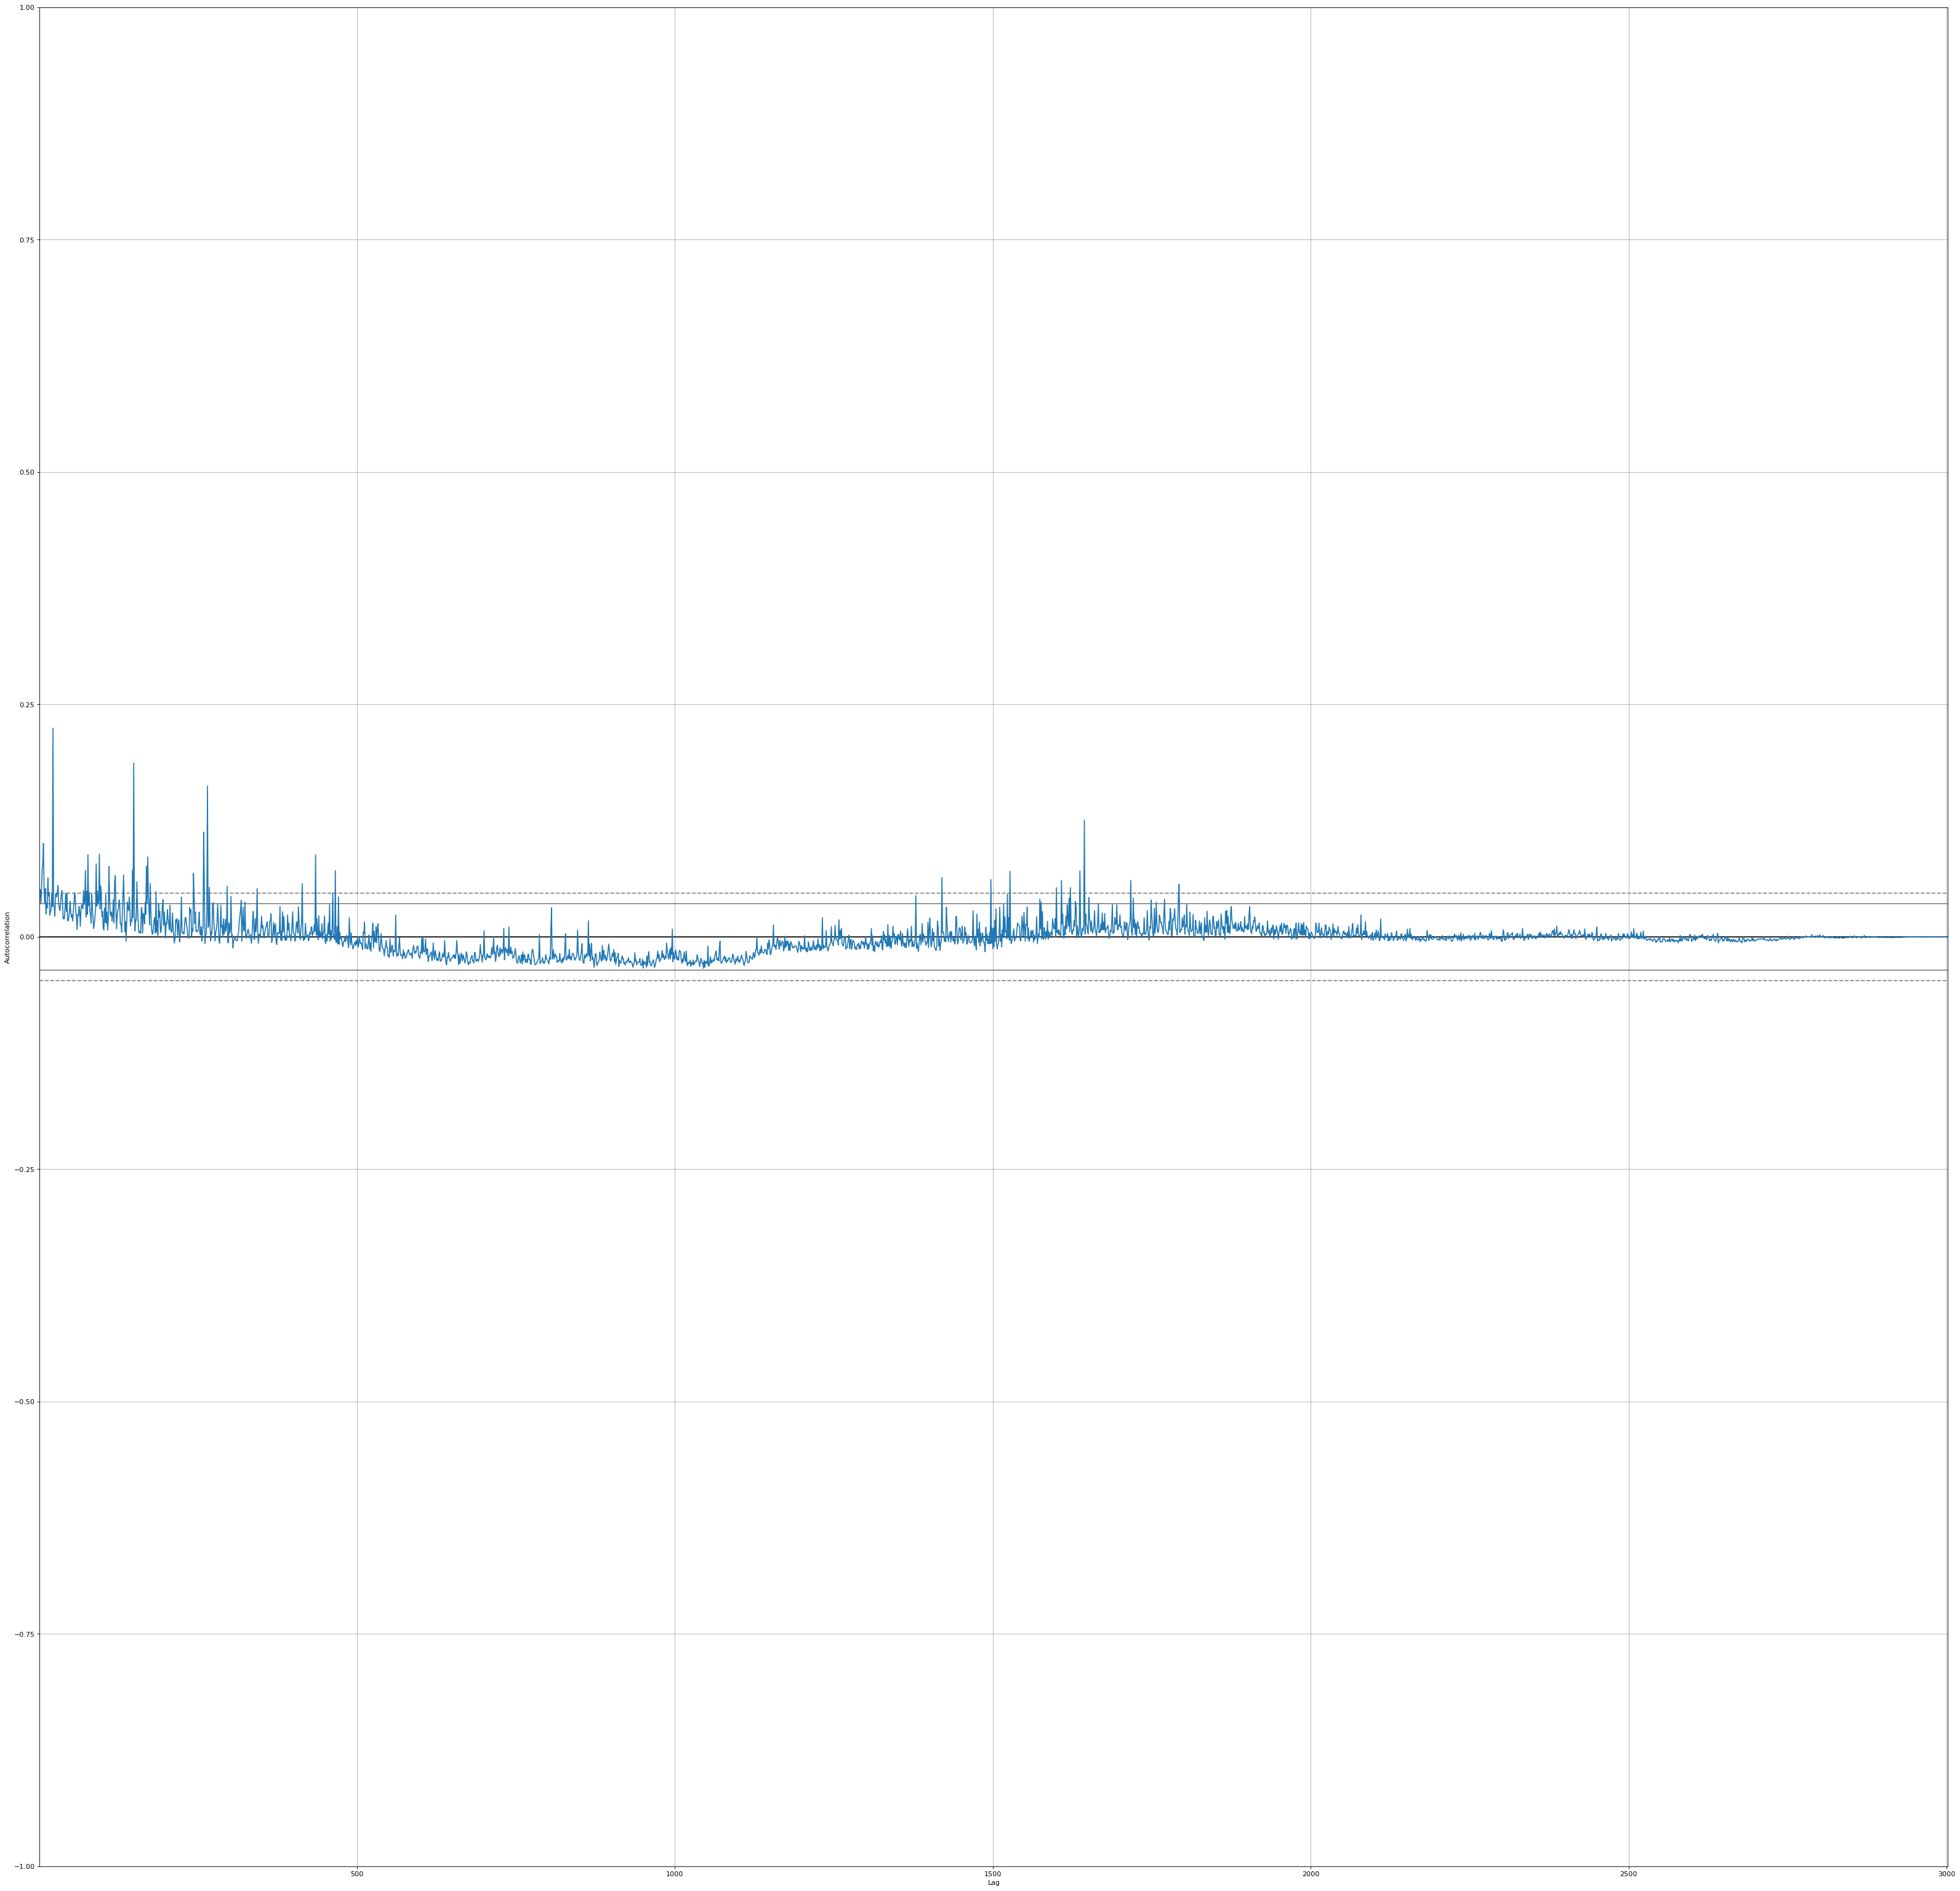

In [8]:
figure(figsize=(50,50),dpi=80)
autocorrelation_plot(Data_Dine)
plt.show()

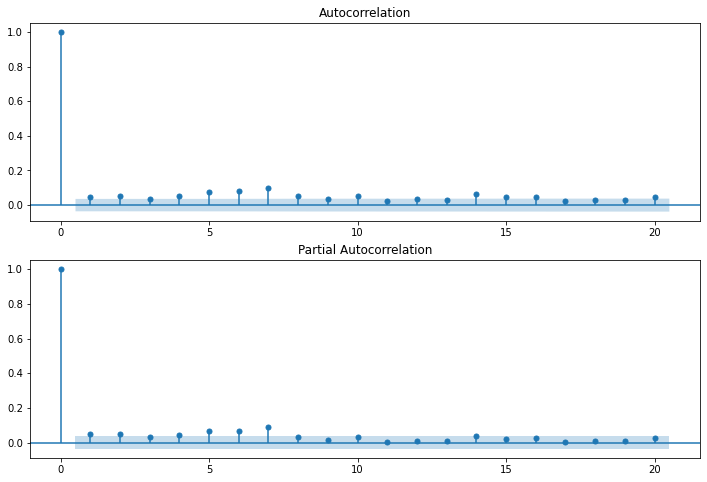

In [9]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig= sm.graphics.tsa.plot_acf(Data_Dine,lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(Data_Dine, lags=20, ax=ax2)


In [10]:
Data_Dine_Train = Data_Dine.iloc[:len(Data_Dine) - 600]
Data_Dine_Test = Data_Dine.iloc[len(Data_Dine)-600:]
Data_Dine_S = Data_Dine.iloc[: len(Data_Dine) - 1501]


In [11]:
res = seasonal_decompose(Data_Dine_S)
fig,(ax1,ax2,ax3)=plt.subplots(3,1,figsize=(500,300))
ax= res.seasonal.plot(ax=ax1)

In [12]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12)
                for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))


Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [13]:
warnings.filterwarnings("ignore")  # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod =SARIMAX(Data_Dine,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:68949.31359224429
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:68639.52671811206
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:70324.41970508649
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:68220.55012557638
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:68651.12128373109
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:68413.16576359724
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:69227.25911735505
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:68221.44468517667
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:68877.52322532062
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:68582.49149943523
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:70301.45178872325
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:68628.79995678317
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:68620.09537798361
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:68399.89170733863
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:69336.59525320759
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:68630.79001441214
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:70544.26605178634
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:70273.17829113768
ARIMA(0, 1

In [14]:
Dine_Model_1= ARIMA(Data_Dine_Train, order=(0,0,1)).fit(disp=0)

In [15]:
Dine_Model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:         Dine In Amount   No. Observations:                 2402
Model:                     ARMA(0, 1)   Log Likelihood              -27689.782
Method:                       css-mle   S.D. of innovations          24559.740
Date:                Sat, 27 Nov 2021   AIC                          55385.563
Time:                        11:55:29   BIC                          55402.915
Sample:                    09-01-2013   HQIC                         55391.876
                         - 03-29-2020                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 8336.8859    515.233     16.181      0.000    7327.048    9346.724
ma.L1.Dine In Amount     0.0282      0.020      1.429      0.153      -0.010       0.067
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1          -35.4798           +0.0000j           35.4798            0.5000
-----------------------------------------------------------------------------
"""

In [16]:
Arima_Pred=Dine_Model_1.predict(start = Data_Dine_Train.shape[0],end= Data_Dine_Train.shape[0]+600)
Arima_Pred


2020-03-30    8108.351346
2020-03-31    8336.885928
2020-04-01    8336.885928
2020-04-02    8336.885928
2020-04-03    8336.885928
                 ...     
2021-11-16    8336.885928
2021-11-17    8336.885928
2021-11-18    8336.885928
2021-11-19    8336.885928
2021-11-20    8336.885928
Freq: D, Length: 601, dtype: float64

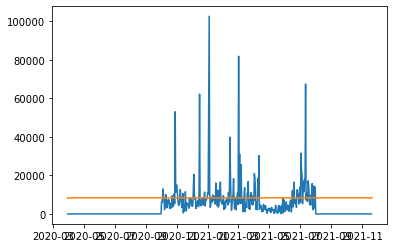

In [17]:
plt.plot(Data_Dine_Test)
plt.plot(Arima_Pred)

In [18]:
# np.sqrt(mean_squared_error(Data_Dine_Test, Arima_Pred))


In [19]:
Dine_Model_2 = SARIMAX(Data_Dine_Train, order=(0, 0, 1),
                              seasonal_order=(1, 0, 0, 12)).fit(disp=0)


In [20]:
Dine_Model_2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                      Dine In Amount   No. Observations:                 2402
Model:             SARIMAX(0, 0, 1)x(1, 0, [], 12)   Log Likelihood              -27791.342
Date:                             Sat, 27 Nov 2021   AIC                          55588.684
Time:                                     11:55:30   BIC                          55606.036
Sample:                                 09-01-2013   HQIC                         55594.997
                                      - 03-29-2020                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0914      0.010      9.116      0.000       0.072       0.111
ar.S.L12       0.1083      0.008     12.842      0.000       0.092       0.125
sigma2      6.657e+08    1.2e-11   5.53e+19      0.000    6.66e+08    6.66e+08
===================================================================================
Ljung-Box (L1) (Q):                  10.74   Jarque-Bera (JB):          39122752.41
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               5.69   Skew:                            20.42
Prob(H) (two-sided):                  0.00   Kurtosis:                       626.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.68e+32. Standard errors may be unstable.
"""

In [21]:
Sarima_Pred = Dine_Model_2.predict(
    start=Data_Dine_Train.shape[0], end=Data_Dine_Train.shape[0]+600)
Sarima_Pred


2020-03-30    3.825071e+02
2020-03-31    2.700909e+02
2020-04-01    1.312551e+02
2020-04-02    2.729066e+01
2020-04-03    5.448517e-15
                  ...     
2021-11-16    7.112759e-63
2021-11-17    6.081394e-62
2021-11-18    5.249751e-63
2021-11-19    7.219954e-63
2021-11-20    2.057381e-46
Freq: D, Name: predicted_mean, Length: 601, dtype: float64

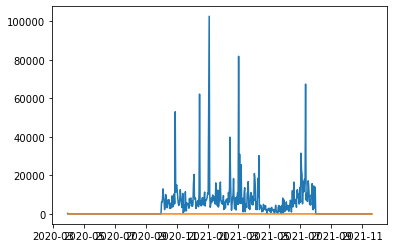

In [22]:
plt.plot(Data_Dine_Test)
plt.plot(Sarima_Pred)


In [23]:
#np.sqrt(mean_squared_error(Data_Dine_Test, Sarima_Pred))


In [24]:
Dine_Model_3 = ExponentialSmoothing(Data_Dine_Train,trend="add",seasonal="add",seasonal_periods=365).fit()


In [25]:
Dine_Model_3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                       ExponentialSmoothing Model Results                       
================================================================================
Dep. Variable:           Dine In Amount   No. Observations:                 2402
Model:             ExponentialSmoothing   SSE                  1654175172121.232
Optimized:                         True   AIC                          49619.340
Trend:                         Additive   BIC                          51753.657
Seasonal:                      Additive   AICC                         49755.313
Seasonal Periods:                   365   Date:                 Sat, 27 Nov 2021
Box-Cox:                          False   Time:                         11:55:31
Box-Cox Coeff.:                    None                                         
==================================================================================
                           coeff                 code              optimized      
----------------------------------------------------------------------------------
smoothing_level                0.0050000                alpha                 True
smoothing_trend                0.0050000                 beta                 True
smoothing_seasonal             0.3198214                gamma                 True
initial_level                  10786.571                  l.0                 True
initial_trend                 -15.176851                  b.0                 True
initial_seasons.0              42935.429                  s.0                 True
initial_seasons.1              28350.429                  s.1                 True
initial_seasons.2             -10189.571                  s.2                 True
initial_seasons.3             -10786.571                  s.3                 True
initial_seasons.4             -5787.5714                  s.4                 True
initial_seasons.5             -9889.5714                  s.5                 True
initial_seasons.6             -9314.5714                  s.6                 True
initial_seasons.7              15093.429                  s.7                 True
initial_seasons.8             -5868.5714                  s.8                 True
initial_seasons.9             -10676.571                  s.9                 True
initial_seasons.10            -9230.5714                 s.10                 True
initial_seasons.11            -9099.5714                 s.11                 True
initial_seasons.12            -7214.5714                 s.12                 True
initial_seasons.13            -8002.5714                 s.13                 True
initial_seasons.14             2710.4286                 s.14                 True
initial_seasons.15            -6973.5714                 s.15                 True
initial_seasons.16             26181.429                 s.16                 True
initial_seasons.17            -10786.571                 s.17                 True
initial_seasons.18            -8904.5714                 s.18                 True
initial_seasons.19            -8743.5714                 s.19                 True
initial_seasons.20            -2315.5714                 s.20                 True
initial_seasons.21            -4849.5714                 s.21                 True
initial_seasons.22            -9978.5714                 s.22                 True
initial_seasons.23            -390.57143                 s.23                 True
initial_seasons.24            -8249.5714                 s.24                 True
initial_seasons.25            -8428.5714                 s.25                 True
initial_seasons.26            -6217.5714                 s.26                 True
initial_seasons.27            -6543.5714                 s.27                 True
initial_seasons.28             15553.429                 s.28                 True
initial_seasons.29             16577.429                 s.29          

In [26]:
ES_Pred = Dine_Model_3.predict(
    start=Data_Dine_Train.shape[0], end=Data_Dine_Train.shape[0]+600)
ES_Pred


2020-03-30    1994.933656
2020-03-31    5750.285771
2020-04-01    4196.899700
2020-04-02    2033.156681
2020-04-03    3466.148318
                 ...     
2021-11-16    4779.439860
2021-11-17   -3035.105670
2021-11-18    5934.729620
2021-11-19   -4790.240464
2021-11-20   -3823.068305
Freq: D, Length: 601, dtype: float64

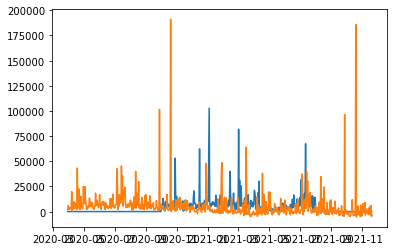

In [27]:
plt.plot(Data_Dine_Test)
plt.plot(ES_Pred)


In [28]:
#np.sqrt(mean_squared_error(Data_Dine_Test, ES_Pred))
